# Exploration

The data used in this notebook were found online on Free Internet Chess Server (FICS) https://www.ficsgames.org/download.html

Before exploring the data, we need to figure out how the chess library in Python works.

In [1]:
# importing the needed libraries
import pandas as pd 
import chess.pgn
import chess

* Checking how many lines the .pgn file has

In [2]:
! wc -l ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

 19191183 /Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn


* Taking a look at the format of the data, to figure out what we need and what not for our analysis

In [3]:
! head -20 ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn 

* Counting how many times the word 'FICSGamesDBGameNo' appears in the file, which indicates 

In [4]:
! grep FICSGamesDBGameNo ~/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn | wc -l

  955855


As we can observe there are 955,855 games for January 2017. 

In [5]:
# reading in the data
pgn = open("/Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn")

In order to run our analysis faster we are going to get a subset of data.

In [ ]:
# creating a list of the first 10000 games
events = []
for i in range(1,10001):
    first_game = chess.pgn.read_game(pgn)
    events.append(first_game.headers["FICSGamesDBGameNo"])

In [ ]:
events = []
for i in range(1,100):
    first_game = chess.pgn.read_game(pgn)
    for move in first_game.main_line():
#         print move
#         print(first_game.board())
        board = first_game.board()
        board.push(move)
#         print(first_game.board())
#     events.append(first_game.headers["FICSGamesDBGameNo"])
# there is an issue here, cause instead of it printing 

In [18]:
first_game.is_end()

False

In [22]:
moves = first_game.main_line()
first_game.board().variation_san(moves)

'1. e4 c5 2. Nf3 Nc6 3. c3 d6 4. d4 cxd4 5. cxd4 g6 6. d5 Nb8 7. Nc3 Bg7 8. Be3 Nf6 9. Rc1 Bd7 10. Qb3 b6 11. Nb5 Na6 12. e5 Ng4 13. e6 fxe6 14. Nxd6+ exd6 15. dxe6 Bc8 16. Qa4+ Ke7 17. Qxg4 Nc5 18. Bg5+ Bf6 19. Bxf6+ Kxf6 20. Qf4+ Kg7 21. Qf7+ Kh6 22. e7 Qd7 23. Qf8+ Rxf8 24. exf8=Q+ Kh5 25. Be2 g5 26. Ne5+ g4 27. Nxd7 Nxd7 28. Rxc8 Nxf8 29. Rxa8 Ng6 30. O-O a5 31. Rb8 Kg5 32. Rxb6 h5 33. Rxd6 Nf4 34. Ra6 h4 35. Bc4'

In [26]:
first_game = chess.pgn.read_game(pgn)

In [ ]:
first_game.board().board

In [34]:
board = first_game.board()
for move in first_game.main_line():
    print(move)
    
    


d2d4
e7e6
e2e4
h7h5
f1d3
f8b4
c2c3
b4e7
d1c2
e7g5
b1d2
b7b6
g1f3
g5f6
e4e5
f6e7
d3e4
b8c6
d2b3
c8b7
c1e3
g7g5
c2d2
g5g4
f3g1
a7a5
f2f3
g4f3
g1f3
e7h4
g2g3
h4e7
d2c2
h5h4
g3g4
h4h3
e1c1
g8h6
e3h6
h8h6
c2d2
h6h8
d2e3
a5a4
b3d2
c6a5
d1f1
h8g8
h1g1
a8b8
c1c2
b7a6
f1f2
b6b5
e4d3
b8b6
e3h6
b5b4
d3a6
b4b3
a2b3
a4b3
d2b3
b6a6
b3a5
a6a5
h6h3
d8a8
h3h7
g8f8
h7d3
a8d5
f2g2
a5a7
g4g5
a7b7
h2h4
d5b3
c2c1
b7a7
d3b1
b3d5
f3d2
f8h8
g2h2
a7a6
g5g6
f7g6
b1g6
e8d8
g6g7
h8e8
h2g2
d5a2
h4h5
a2a1
c1c2
a1a4
d2b3
a6b6
h5h6
a4b3
c2d3
b3b5
d3e3
d7d5
h6h7


In [ ]:
first_game.headers["BlackElo"]

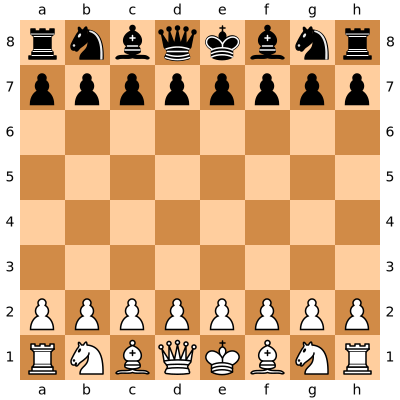

In [8]:
first_game.board()

In [ ]:
for move in first_game.main_line():
...     board.push(move)

In [ ]:
board = first_game.board()
i = 0
for move in first_game.main_line():
    i += 1
    print(i)
    print(move)

In [ ]:
# pawn - στρατιωτης
# king 
# queen 
# knight - ιππος
# beishop
# rook

In [ ]:
board

In [ ]:
board.is_game_over()

In [ ]:
print(board)

In [ ]:
import io
import chess
import chess.uci as uci
import chess.pgn as pgn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import io
import seaborn as sns

In [ ]:
with io.open('/Users/danaiavg/Downloads/ficsgamesdb_201701_chess_movetimes_1545427.pgn',encoding="utf-8-sig") as pgnin:
    game = chess.pgn.read_game(pgnin)

In [ ]:
board = chess.Board()
node = game

In [ ]:
#establish a dataframe to store my evaluations
attackedlist = pd.DataFrame(index=range(0,64), columns=range(0,ply))
attackedmap = pd.DataFrame (index = [8,7,6,5,4,3,2,1],columns =[1,2,3,4,5,6,7,8])

ply = 0
while not node.is_end():
    next_node = node.variations[0]
    node = next_node
    board.push(next_node.move)
    
    for spacesquare in range(64):
        attackers = 0 
        if board.piece_at(spacesquare):
            if board.piece_at(spacesquare).color == chess.BLACK:
                if board.is_attacked_by(chess.WHITE, spacesquare):
                        attackers = len(board.attackers(chess.WHITE, spacesquare))-\
                                    len(board.attackers(chess.BLACK, spacesquare))
            if board.piece_at(spacesquare).color==chess.WHITE:
                if board.is_attacked_by(chess.BLACK, spacesquare):
                        attackers = len(board.attackers(chess.WHITE, spacesquare))-\
                                    len(board.attackers(chess.BLACK, spacesquare))      
            attackedlist.set_value(spacesquare,ply,attackers)        
    ply += 1

plytotal = ply

attackedlist['sum'] = attackedlist.sum(axis=1)

## References